# All Statistics 8.5.3

Create a sample of size 100 from normal distribution, and use DKW inequality to create a 95% confidence band from the sample. Then check wither the normal cdf lies in the confidence band.

Do this 1000 times to see what the confidence actually is of the constructed confidence bands.

Doing this experiment once gave a confidence of 0.971.
Standard error of this confidence approximately equals sqrt(0.971*(1-0.971)/1000) = 0.005.

In [1]:
from tqdm.notebook import tqdm

import math
import numpy as np
from scipy.stats import norm
from numba import vectorize, float64

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)

In [3]:
def create_empirical_dist_fn(sample):
    """
    takes as input a sample, and outputs the empirical distribution
    function of the sample
    """
    n = len(sample)
    def Fn(x):
        return (sample < x).sum()/n
    return Fn

In [4]:
def create_confidence_band(sample, alpha):
    """
    takes as input a sample, and outputs a 1-alpha confidence band for the
    cdf of generating distribution, using bounds from dwk inequality
    output is Ln and Un which give lower bound and upper bound of
    cdf
    """
    n = len(sample)
    Fn = create_empirical_dist_fn(sample)
    eps_n = (math.log(2/alpha)/2/n)**0.5
    
    @vectorize([float64(float64)])
    def Ln(x):
        Fnx = Fn(x)
        return max(0, Fnx - eps_n)
    
    @vectorize([float64(float64)])
    def Un(x):
        Fnx = Fn(x)
        return min(1, Fnx + eps_n)
    
    return Ln, Un

In [5]:
def test_sample(sample, alpha, plot = False):
    """
    takes as input a sample, and determines if the 1-alpha confidence band
    produced from it contains the true cdf
    
    if optional argument plot is True, produces a line plot to visualise whether
    the cdf is contained in the band or not
    """
    Ln, Un = create_confidence_band(sample, alpha)
    x = np.arange(min(sample)+0.1, max(sample), 0.1)
    Lnx = Ln(x)
    Unx = Un(x)
    norm_x = norm.cdf(x)
    
    if plot:
        plt.plot(x, Lnx)
        plt.plot(x, Unx)
        plt.plot(x, norm_x)
        plt.show()
    return np.logical_and((norm_x >= Lnx).all(), (norm_x <= Unx).all())

In [6]:
sample = np.random.normal(size = 100)

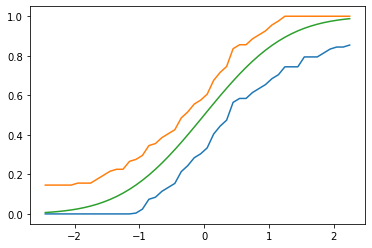

True

In [8]:
test_sample(sample, alpha = 0.05, plot=True)

In [9]:
def create_test_N_samples(N, sample_size = 100, alpha = 0.05):
    """
    create N samples, and determine what proportion of them produce confidence
    bands that contain the true cdf
    """
    within_confidence_band = 0
    for i in tqdm(range(N)):
        sample = np.random.normal(size = sample_size)
        within_confidence_band += test_sample(sample, alpha)
    
    return within_confidence_band / N

In [11]:
ratio = create_test_N_samples(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
ratio

0.971